<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import-packages" data-toc-modified-id="import-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import packages</a></span></li><li><span><a href="#import-agent-data-and-IRC-result" data-toc-modified-id="import-agent-data-and-IRC-result-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>import agent data and IRC result</a></span><ul class="toc-item"><li><span><a href="#policy-of-the-teacher-POMDP-and-trained-neural-network" data-toc-modified-id="policy-of-the-teacher-POMDP-and-trained-neural-network-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>policy of the teacher POMDP and trained neural network</a></span></li><li><span><a href="#Contour-of-IRC" data-toc-modified-id="Contour-of-IRC-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Contour of IRC</a></span></li><li><span><a href="#comparison-of-parameters" data-toc-modified-id="comparison-of-parameters-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>comparison of parameters</a></span></li><li><span><a href="#Hessian" data-toc-modified-id="Hessian-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Hessian</a></span></li><li><span><a href="#correlation/covariance-between-parameters" data-toc-modified-id="correlation/covariance-between-parameters-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>correlation/covariance between parameters</a></span></li></ul></li><li><span><a href="#posterior-based-on-estimated-parameters" data-toc-modified-id="posterior-based-on-estimated-parameters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>posterior based on estimated parameters</a></span></li><li><span><a href="#Neural-coding" data-toc-modified-id="Neural-coding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Neural coding</a></span></li><li><span><a href="#check-std-of-beliefs" data-toc-modified-id="check-std-of-beliefs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>check std of beliefs</a></span></li><li><span><a href="#Calculate-Hessian" data-toc-modified-id="Calculate-Hessian-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calculate Hessian</a></span></li><li><span><a href="#behavioral-statistics" data-toc-modified-id="behavioral-statistics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>behavioral statistics</a></span></li><li><span><a href="#Neural-coding" data-toc-modified-id="Neural-coding-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Neural coding</a></span></li></ul></div>

# import packages

In [1]:
from twoboxCol import *
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import random_projection

import os
path = os.getcwd()

from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec



In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# pdf.fontype and ps.fontype must be set to 42 in order for text in exported figure to be editable in Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "CMU Serif"


In [3]:
"""
color code for color cues
"""
rgb = [[255, 0, 0],
       [255/4*3, 0, 255/4*1],
       [255/4*2, 0, 255/4*2],
       [255/4*1, 0, 255/4*3],
       [0, 0, 255]
      ] 
rgb=np.array(rgb)/255.

cmap_col5 = mpl.colors.ListedColormap(rgb,"")

# import agent data and IRC result

In [4]:
# date of the files
datestring_data = '01262020(150900)'
datestring_train = '01262020(151953)'
datestring_NNagent='01262020(170602)'




In [5]:
idx = 0
datestring_IRC = '01262020'

In [6]:
"""
import IRC data (including trjectories and contour)
"""
dataN_pkl_file_IRC = open(path + '/Results/' + datestring_train + '_data' + datestring_data +  
                   '_agentNN' + datestring_NNagent + '_' + datestring_IRC + 'IRC'+ str(idx) +'_twoboxCol' + '.pkl', 'rb')
dataN_pkl_IRC = pickle.load(dataN_pkl_file_IRC)
dataN_pkl_file_IRC.close()

In [7]:
dataN_pkl_IRC.keys()

dict_keys(['Loglikelihood', 'Qaux1', 'Qaux2', 'Qaux3', 'Loglikelihood_original', 'uValue', 'uValuemesh', 'vValue', 'vValuemesh', 'point', 'point_add_gra', 'LL_add_gra', 'point_all', 'point_final', 'uniques', 'projectionMat', 'belief1_est', 'belief2_est', 'belief1_est_MAP', 'belief2_est_MAP', 'belief1_est_EXP', 'belief2_est_EXP', 'quan_true_bel1_POMDP', 'quan_true_bel2_POMDP', 'hes_final', 'var_para_woCol', 'std_para_woCol'])

In [8]:
point_final = dataN_pkl_IRC['point_final']
point = dataN_pkl_IRC['point']
point_add_gra = dataN_pkl_IRC['point_add_gra']
point_all = dataN_pkl_IRC['point_all']
uniques = dataN_pkl_IRC['uniques']
#LL_slice = dataN_pkl_IRC['LL_slice']
Loglikelihood = dataN_pkl_IRC['Loglikelihood']
Qaux1 = dataN_pkl_IRC['Qaux1']
Qaux2 = dataN_pkl_IRC['Qaux2']
Qaux3 = dataN_pkl_IRC['Qaux3']
Loglikelihood_original = dataN_pkl_IRC['Loglikelihood_original']
uValue = dataN_pkl_IRC['uValue']
uValuemesh = dataN_pkl_IRC['uValuemesh']
vValue = dataN_pkl_IRC['vValue']
vValuemesh = dataN_pkl_IRC['vValuemesh']
projectionMat = dataN_pkl_IRC['projectionMat']
belief1_est= dataN_pkl_IRC['belief1_est']
belief2_est = dataN_pkl_IRC['belief2_est']
belief1_est_MAP = dataN_pkl_IRC['belief1_est_MAP']
belief2_est_MAP = dataN_pkl_IRC['belief2_est_MAP']
belief1_est_EXP = dataN_pkl_IRC['belief1_est_EXP']
belief2_est_EXP = dataN_pkl_IRC['belief2_est_EXP']
quan_true_bel1 = dataN_pkl_IRC['quan_true_bel1_POMDP']
quan_true_bel2 = dataN_pkl_IRC['quan_true_bel2_POMDP']
hes_final = dataN_pkl_IRC['hes_final']
std_final = dataN_pkl_IRC['std_para_woCol']
var_para_woCol = dataN_pkl_IRC['var_para_woCol']
LL_add_gra = dataN_pkl_IRC['LL_add_gra']

In [9]:
"""
import parameters of the NN agent in the test case
"""

para_pkl_file = open(path + '/Results/'+ datestring_train +'_data'+ datestring_data+
                     '_agent' + datestring_NNagent + '_mainPara_twoboxCol.pkl', 'rb')
para_pkl = pickle.load(para_pkl_file)
para_pkl_file.close()
nq, na, nr, nl, Numcol, discount, parametersAgent, parametersExp = para_pkl['NNtest_params']
Numcol = parametersAgent[7]  # number of colors
Ncol = Numcol - 1  # number value: 0 top Numcol-10.99

In [10]:
"""
import  of the NN agent in the test case, where the bahevior data is used by the IRC 
"""
dataN_pkl_file1 = open(path + '/Results/'+ datestring_train + '_data' + datestring_data + 
                       '_agentNNdriven' + datestring_NNagent + '_twoboxCol.pkl', 'rb')
dataN_pkl1 = pickle.load(dataN_pkl_file1)
dataN_pkl_file1.close()

T = dataN_pkl1['observations'].shape[1]
obs = dataN_pkl1['observations'][idx,:T, :5].astype(int) 
lat = dataN_pkl1['POMDP_agent'][idx, :T, 1:]
obs_IRC = dataN_pkl1['observations'][idx,:5000, :5].astype(int)   #NN agent behavior
lat_IRC = dataN_pkl1['POMDP_agent'][idx, :5000, 1:]  #POMDP agent beliefs, for comparison

act = obs[:, 0]
rew = obs[:, 1]
loc = obs[:, 2]
col1 = obs[:, 3]
col2 = obs[:, 4]

act_POMDP = dataN_pkl1['POMDP_agent'][idx, :T, 0]

## policy of the teacher POMDP and trained neural network

Text(0, 0.5, 'policy $\\pi(a_t|b_t)$')

findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


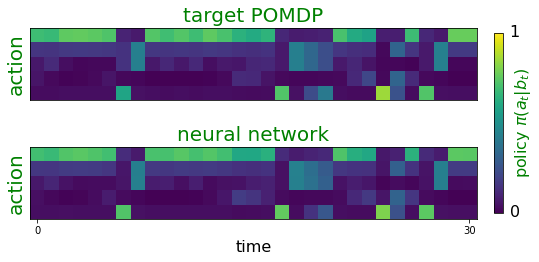

In [11]:
training_policy_show = list(np.arange(35,66))
fig_NNtraining, ax = plt.subplots(2,1,figsize=(8,4))

ax[0].imshow(dataN_pkl1['POMDP_agent_dist'][idx,training_policy_show, :na].T, vmin = 0, vmax = 1)
ax[0].set_ylabel('action',  fontsize = 20, color = 'green')
ax[0].set_title ( 'target POMDP', fontsize = 20, color = 'green')
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(dataN_pkl1['observations'][idx, training_policy_show, -na:].T, vmin = 0, vmax = 1)
ax[1].set_xlabel('time', fontsize = 16) 
ax[1].set_ylabel('action',  fontsize = 20, color = 'green')
ax[1].set_title ( 'neural network', fontsize = 20, color = 'green')
ax[1].set_xticks([0, 30])
ax[1].set_yticks([])

cbar_ax = fig_NNtraining.add_axes([0.93, 0.193, 0.015, 0.625])
cb = plt.colorbar(im, cax=cbar_ax)
for j, lab in enumerate(['0','1']):
    cb.ax.text(2.4, j , lab, ha='center', va='center', fontsize = 16)
cb.ax.get_yaxis().set_ticks([])
cb.ax.get_yaxis().labelpad = 10
cb.ax.set_ylabel('policy $\pi(a_t|b_t)$', rotation=90, fontsize = 16, color = 'green')


#plt.outline.set_visible(False)

#fig_NNtraining.savefig('NNtraining.pdf', format='pdf', bbox_inches = 'tight')

## Contour of IRC

findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


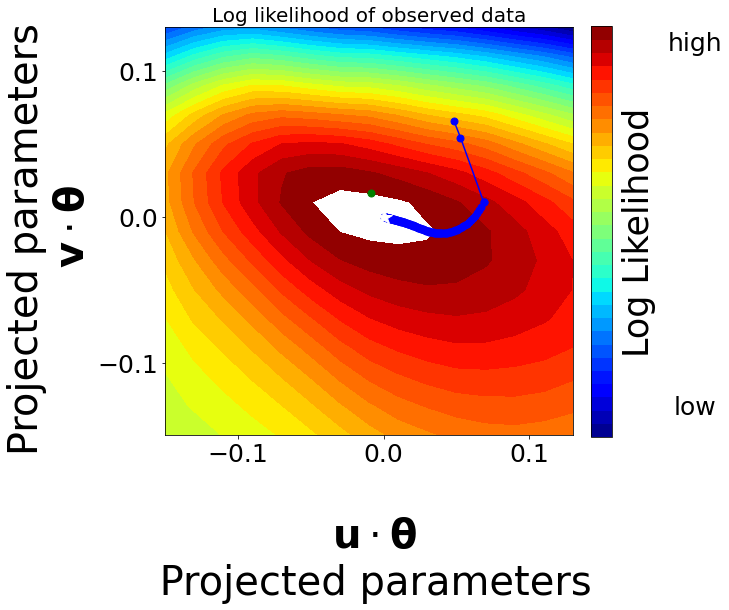

In [12]:
"""
figure for contour
"""
# project the trajectories onto the plane
point_2d = projectionMat.dot((point_all - point_all[-1]).T).T   

# true parameters projected onto the plane
true_2d = projectionMat.dot(parametersAgent - point_all[-1])

fig_contour, ax = plt.subplots(figsize = (8, 8))
uValuemesh, vValuemesh = np.meshgrid(uValue[:], vValue[:])
cs3 = plt.contourf(uValuemesh, vValuemesh, Loglikelihood[:, :], 
                  np.arange(np.min(Loglikelihood[:, :]), np.max(Loglikelihood[:, :]), 40), cmap='jet')
plt.xticks(np.arange(-1, 1, 0.1), fontsize = 25)
plt.yticks(np.arange(-1, 1, 0.1), fontsize = 25)

plt.plot(point_2d[:, 0], point_2d[:, 1], marker='.', color = 'b', markersize = 14)   # projected trajectories
plt.plot(point_2d[-1, 0], point_2d[-1, 1], marker='*', color = 'w', markersize = 16)        # final point
plt.plot(true_2d[0], true_2d[1], marker='.', color = 'g', markersize = 14)           # true
ax.set_aspect('equal')

ax.set_title('Log likelihood of observed data', fontsize = 20, fontname = 'CMU Serif')
plt.xlabel('\n $\mathbf{u} \cdot \mathbf{\\theta}$ \n Projected parameters', fontsize = 40, fontname = 'CMU Serif')
plt.ylabel('Projected parameters \n $\mathbf{v} \cdot \mathbf{\\theta}$', fontsize = 40, fontname = 'CMU Serif')
#plt.clabel(cs3, inline=1, fontsize=10)
cbar = plt.colorbar(cs3,fraction=0.046, pad=0.04)
for j, lab in enumerate(['low','high']):
    cbar.ax.text(2.4, j * 1100 - 6200, lab, ha='center', va='center', fontsize = 25)
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('Log Likelihood', rotation=90, fontsize = 35, fontname = 'CMU Serif')

plt.show()

#fig_contour.savefig('contour.pdf', format='pdf', bbox_inches = 'tight')

findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


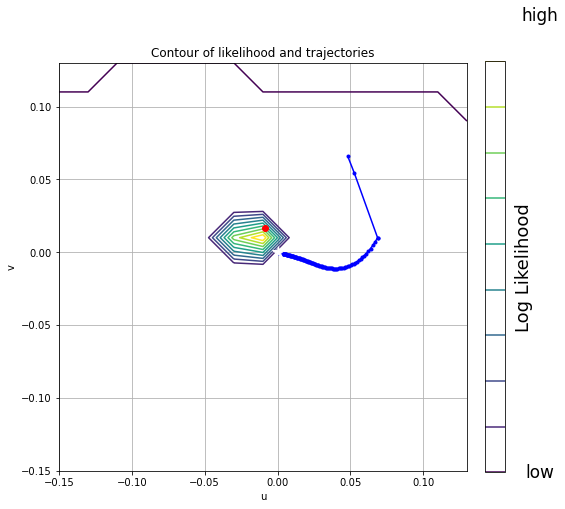

In [13]:
fig_contour, ax = plt.subplots(figsize = (8, 8))

prob_nor = np.exp(Loglikelihood - np.max(Loglikelihood))
uValuemesh1, vValuemesh1 = np.meshgrid(uValue[:], vValue[:])
cs_nor = plt.contour(uValuemesh1, vValuemesh1, prob_nor[:, :], 
                  np.arange(np.min(prob_nor[:,:]), np.max(prob_nor[:,:]), 0.1))

plt.plot(point_2d[:, 0], point_2d[:, 1], marker='.', color = 'b')   # projected trajectories
plt.plot(point_2d[-1, 0], point_2d[-1, 1], marker='*', color = 'w', markersize = 12)        # final point
plt.plot(true_2d[0], true_2d[1], marker='o', color = 'r')           # true
ax.set_aspect('equal')


#plt.xticks(np.arange(0, 1, 0.1))
#plt.yticks(np.arange(0, 1, 0.1))
ax.grid()
ax.set_title('Contour of likelihood and trajectories')
plt.xlabel('u')
plt.ylabel('v')
plt.clabel(cs3, inline=1, fontsize=10)
cbar = plt.colorbar(cs_nor,fraction=0.046, pad=0.04)
for j, lab in enumerate(['low','high']):
    cbar.ax.text(2.4, j , lab, ha='center', va='center', fontsize = 17, fontname = 'CMU Serif')
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('Log Likelihood', rotation=90, fontsize = 18, fontname = 'CMU Serif')



plt.show()

In [14]:
# para = np.copy(point_final)
# para[-2] = 0.6
# para[0] = 0.15
# twoboxCol = twoboxColMDP(discount, nq, nr, na, nl, para)
# twoboxCol.setupMDP()
# if np.any(twoboxCol.ThA<0) == True:
#     Qaux2[j, i] = np.nan
#     Qaux3[j, i] = np.nan
# else:
#     twoboxCol.solveMDP_sfm()
#     ThA = twoboxCol.ThA
#     policy = twoboxCol.softpolicy
#     pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
#     Trans_hybrid_obs12 = twoboxCol.Trans_hybrid_obs12
#     Obs_emis_trans1 = twoboxCol.Obs_emis_trans1
#     Obs_emis_trans2 = twoboxCol.Obs_emis_trans2
#     twoboxColHMM = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)

#     #Qaux1[j, i] = twoboxHMM.likelihood(lat, obs, ThA, policy)  #given latent state
# twoboxColHMM.computeQaux(obs_IRC, ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2) + twoboxColHMM.latent_entr(obs_IRC) 

## comparison of parameters

findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


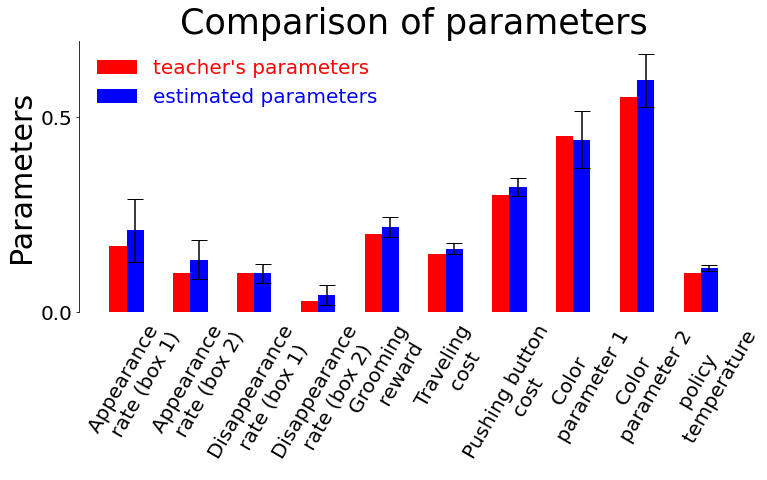

In [15]:
"""
Comparison of parameters
"""

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig_parameters = plt.figure(figsize = (12, 5))
ax = fig_parameters.add_subplot(111)

zvals = parametersAgent[:7] + parametersAgent[8:]
yvals = point_final.tolist()[:7] + point_final.tolist()[8:]
rects1 = ax.bar(ind, zvals, width, color='r')
rects2 = ax.bar(ind+width, yvals, yerr=2*std_final, width = width, color = 'b', 
                align='center', alpha=1, ecolor='black', capsize=8)

ax.set_title('Comparison of parameters', fontsize = 35)
ax.set_ylabel('Parameters', fontsize = 30)
ax.set_yticks([0, 0.5])
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Appearance \n rate (box 1)', 'Appearance \n rate (box 2)', 'Disappearance \n rate (box 1)', 
                    'Disappearance \n rate (box 2)','Grooming \n reward', 'Traveling \n cost', 'Pushing button \n cost',
                    'Color \n parameter 1','Color \n parameter 2', 'policy \n temperature'), rotation=60, 
                   ha = 'center', fontsize = 20)
leg = ax.legend( (rects1[0], rects2[0]), ('teacher\'s parameters', 'estimated parameters' ), 
                fontsize = 20 , frameon=False)
leg_c = ['r', 'b']
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = leg_c[i])

ax.xaxis.set_tick_params(length = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

#fig_parameters.savefig('parameters.pdf', format='pdf', bbox_inches = 'tight')

## Hessian

In [16]:
from numpy import savetxt
savetxt('hes_final.csv', hes_final, delimiter=',')

In [17]:
hes_final

array([[-5.60339686e+03, -2.19188223e+02,  2.16305125e+04,
        -8.80390871e+02,  1.63363438e+04,  1.32667992e+04,
         9.36506694e+03,  0.00000000e+00, -1.95177563e+03,
        -3.26508598e+03, -1.99042915e+04],
       [-2.19188223e+02, -2.09820428e+04,  4.22915036e+02,
         3.51064955e+04,  1.73995431e+04,  1.17124728e+04,
         9.96715244e+03,  0.00000000e+00, -7.03403202e+03,
        -1.35687515e+04, -1.96905603e+04],
       [ 2.16305125e+04,  4.22915036e+02, -1.11725967e+05,
         5.89716365e+03, -7.74753062e+04, -6.42739906e+04,
        -4.43678800e+04,  0.00000000e+00,  4.83942131e+03,
         1.78160917e+04,  7.24176061e+04],
       [-8.80390871e+02,  3.51064955e+04,  5.89716365e+03,
        -9.59707904e+04, -3.35621735e+04, -2.12185114e+04,
        -1.85436875e+04,  0.00000000e+00,  1.55923772e+04,
         2.78832886e+04,  1.52767825e+04],
       [ 1.63363438e+04,  1.73995431e+04, -7.74753062e+04,
        -3.35621735e+04, -8.58708518e+04, -6.65249900e+04,
  

In [18]:
selec_idx = list(range(7)) + list(range(8,11))

In [19]:
w, v = np.linalg.eig(hes_final[np.ix_(selec_idx, selec_idx)])
w[5], v[5]

(-238.13795963336256,
 array([ 0.3871717 , -0.10091111,  0.0580649 ,  0.83596232, -0.05933245,
         0.02137619, -0.0612954 ,  0.32554046, -0.08936283, -0.12654554]))

In [20]:
point_final

array([0.21023327, 0.13528135, 0.09952121, 0.04401071, 0.21816186,
       0.16304653, 0.32053012, 5.        , 0.44215195, 0.5933881 ,
       0.11438321])

In [21]:
point_final[selec_idx]

array([0.21023327, 0.13528135, 0.09952121, 0.04401071, 0.21816186,
       0.16304653, 0.32053012, 0.44215195, 0.5933881 , 0.11438321])

In [22]:
v[5]/np.sqrt(-w[5])/ point_final[selec_idx]

array([ 0.1193405 , -0.04833778,  0.037808  ,  1.23087508, -0.01762378,
        0.0084958 , -0.01239209,  0.04771106, -0.00975897, -0.07169192])

In [23]:
std_final

array([0.04047267, 0.02484563, 0.01238955, 0.01303729, 0.01279313,
       0.0070596 , 0.01158708, 0.0363209 , 0.03438527, 0.00392591])

In [24]:
std_final / np.linalg.norm(std_final)

array([0.54855598, 0.33675116, 0.16792478, 0.17670396, 0.17339475,
       0.09568401, 0.15704832, 0.492284  , 0.46604903, 0.05321076])

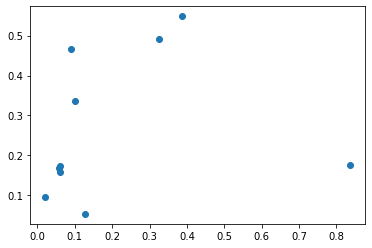

In [25]:
plt.scatter(np.abs(v[5]), std_final / np.linalg.norm(std_final))
#plt.set_aspect()

In [26]:
w_sort = np.sort(w)
w_sort / np.min(w_sort)

array([1.00000000e+00, 2.76605331e-01, 2.30845817e-01, 6.75709490e-02,
       3.61636807e-02, 1.82156971e-02, 1.47982809e-02, 9.68559048e-03,
       2.81882302e-03, 4.68944321e-04])

<ipython-input-27-d731bbdf8170>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Absolute value of Hessian eigenvalues', fontsIZE = 20)


Text(0.5, 1.0, 'Absolute value of Hessian eigenvalues')

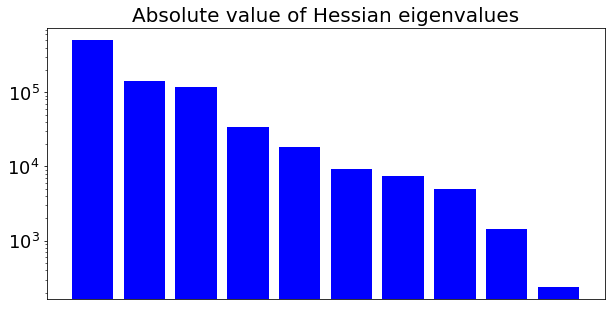

In [27]:
fig_eig = plt.figure(figsize = (10, 5))
ax = fig_eig.add_subplot(111)

plt.yscale('log')
ax.bar(np.arange(N), -w_sort, color = 'blue')
ax.set_xticks([])
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 


plt.title('Absolute value of Hessian eigenvalues', fontsIZE = 20)
#fig_eig.savefig('eigenSpectrum.pdf', format='pdf', bbox_inches = 'tight')

## correlation/covariance between parameters

findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


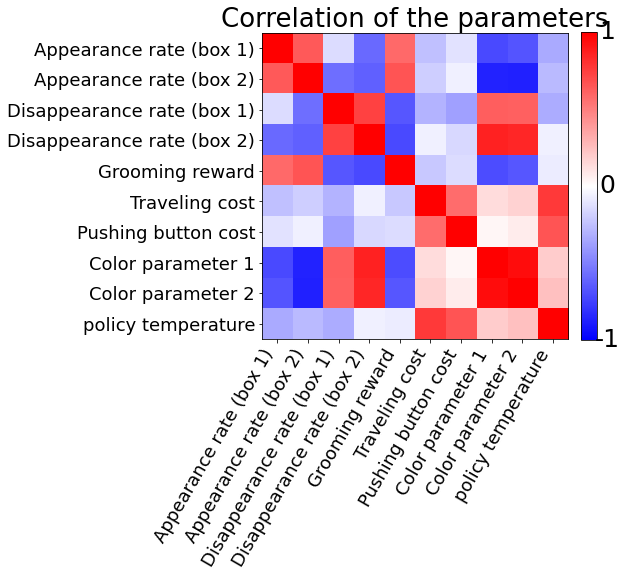

In [28]:
fig_correlation, ax = plt.subplots(figsize = (6, 6))
correlation_mat = np.linalg.inv(np.diag(std_final)).dot(var_para_woCol).dot(np.linalg.inv(np.diag(std_final)))
p_corre = ax.imshow(correlation_mat, 
                    cmap = 'bwr', vmax = np.max(np.abs(correlation_mat)), vmin = - np.max(np.abs(correlation_mat)))
ax.set_title('Correlation of the parameters', fontsize = 26)
ax.set_xticks(list(range(10)))
ax.set_xticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), rotation = 60, 
                   ha = 'right', fontsize = 18)
ax.set_yticks(list(range(10)))
ax.set_yticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), ha = 'right', fontsize = 18)
cbar = fig_correlation.colorbar(p_corre,fraction=0.046, pad=0.04)
for j, lab in enumerate(['-1','0', '1']):
    cbar.ax.text(2.4, j - 1, lab, ha='center', va='center', fontsize = 25)
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 10

#fig_correlation.savefig('correlation.pdf', format='pdf', bbox_inches = 'tight')




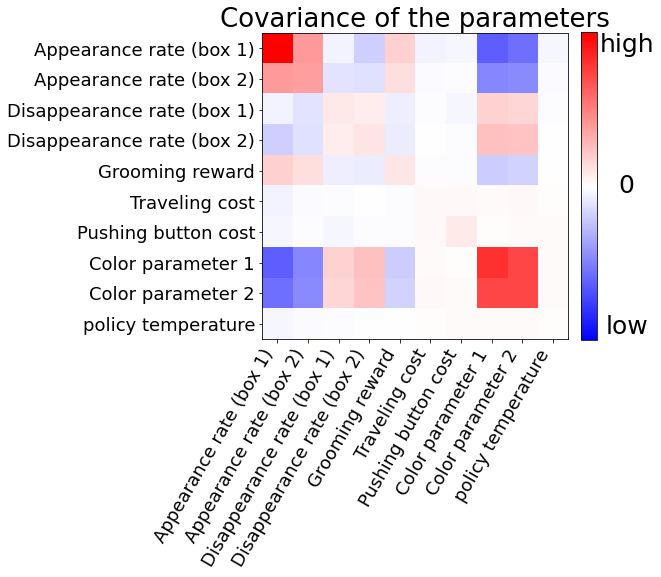

In [29]:
fig_cov, ax = plt.subplots(figsize = (6, 6))
p_cov = ax.imshow(var_para_woCol, cmap = 'bwr', 
             vmin = -np.max(var_para_woCol), vmax = np.max(var_para_woCol))
ax.set_title('Covariance of the parameters', fontsize = 26)
ax.set_xticks(list(range(10)))
ax.set_xticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), rotation = 60, 
                   ha = 'right', fontsize = 18)
ax.set_yticks(list(range(10)))
ax.set_yticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), ha = 'right', fontsize = 18)

cbar = fig_cov.colorbar(p_cov,fraction=0.046, pad=0.04)

for j, lab in enumerate(['low','0', 'high']):
    cbar.ax.text(0.008, 0.0015 * (j - 1), lab, ha='center', va='center', fontsize = 25)
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 10

#fig_cov.savefig('covariance.pdf', format='pdf', bbox_inches = 'tight')


# posterior based on estimated parameters

In [30]:
belief_array = (np.arange(nq) + 1/2)/nq
belief_array

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [31]:
# """
# beliefs of the POMDP agent
# """
# # quan_true_bel1 = find_closest_array(belief_array, lat[:, 0])
# # quan_true_bel2 = find_closest_array(belief_array, lat[:, 1])
# quan_true_bel1 = (lat[:, 0] + 1/2)/nq
# quan_true_bel2 = (lat[:, 1] + 1/2)/nq

In [32]:
para_est = np.copy(point_final)
twoboxCol_est = twoboxColMDP(discount, nq, nr, na, nl, para_est)
twoboxCol_est.setupMDP()
twoboxCol_est.solveMDP_sfm()
ThA = twoboxCol_est.ThA
policy = twoboxCol_est.softpolicy

In [33]:
# pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
# Trans_hybrid_obs12 = twoboxCol_est.Trans_hybrid_obs12
# Obs_emis_trans1 = twoboxCol_est.Obs_emis_trans1
# Obs_emis_trans2 = twoboxCol_est.Obs_emis_trans2
# twoboxColHMM_est = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)

# twoboxColHMM_est.computeQaux(obs, ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2)+ \
# twoboxColHMM_est.latent_entr(obs)

In [34]:
# alpha_est, scale_est = twoboxColHMM_est.forward_scale(obs)
# beta_est = twoboxColHMM_est.backward_scale(obs, scale_est)
# gamma_est = twoboxColHMM_est.compute_gamma(alpha_est, beta_est)
# xi_est = twoboxColHMM_est.compute_xi(alpha_est, beta_est, obs)

In [35]:
# belief1_est = np.sum(np.reshape(gamma_est[:, :].T, (gamma_est.shape[-1], nq, nq)), axis = 2)
# belief2_est = np.sum(np.reshape(gamma_est[:, :].T,(gamma_est.shape[-1], nq, nq)), axis = 1)

In [36]:
# belief1_est_MAP = (np.argmax(belief1_est, axis = 1) + 0.5)/nq
# belief2_est_MAP = (np.argmax(belief2_est, axis = 1) + 0.5)/nq

# belief1_est_EXP = belief1_est.dot(belief_array)
# belief2_est_EXP = belief2_est.dot(belief_array)

findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


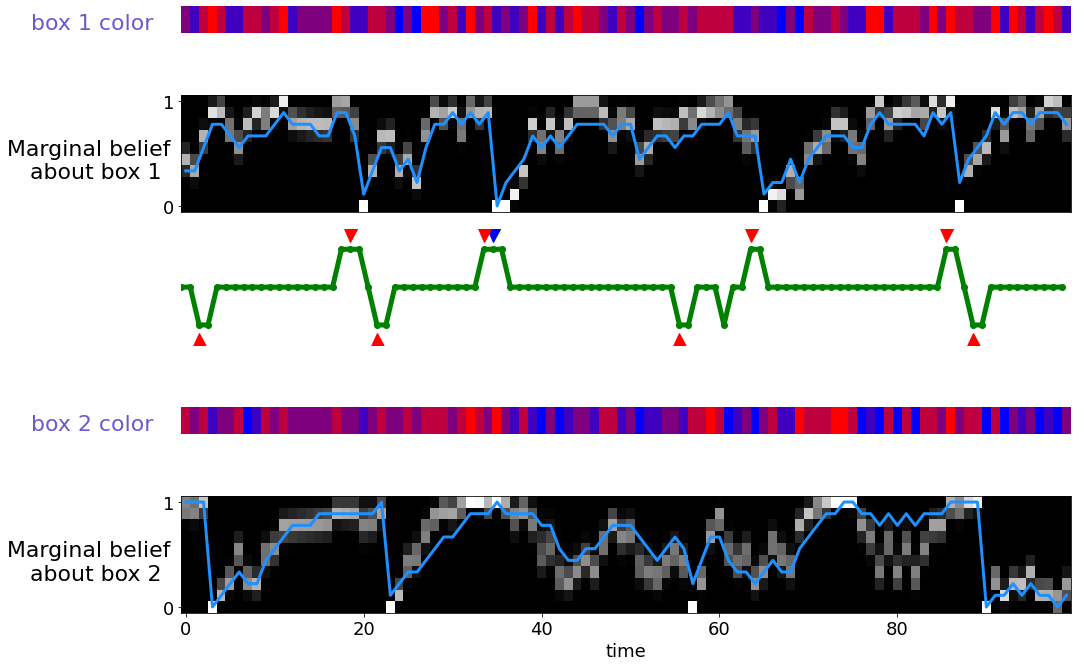

In [37]:
#fig_posterior = plt.figure(figsize= (15, 10))
showlen = 100
startT = 440 

endT = startT + showlen
showT = range(startT,endT)

fig_posterior, [ax3, ax1, ax_loc, ax4, ax2] = plt.subplots(5, 1, figsize= (15, 10))
#plt.figure(figsize = (15,10))
#gs1 = gridspec.GridSpec(5, 1, height_ratios=[3, 3, 3, 1, 3])
#gs1.update(wspace=0.025, hspace=0) # set the spacing between axes. 

#ax3 = plt.subplot(gs1[0])
#ax3 = fig_posterior.add_subplot(511)
ax3.imshow(np.tile(col1[showT], (3,1)), cmap = cmap_col5,vmin=0, vmax=Ncol)
ax3.yaxis.set_label_coords(-0.1,0)
ax3.set_ylabel('box 1 color', color = 'slateblue', rotation= 360, fontsize = 22)
#ax3.xaxis.set_tick_params(length = 0)
#ax3.set_xlim([0, showlen])
ax3.set_xticks([])
ax3.set_yticks([])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)



#ax1 = plt.subplot(gs1[1])
#ax1 = fig_posterior.add_subplot(512)
ax1.imshow(belief1_est[showT].T, interpolation='Nearest', cmap='gray', origin='lower', aspect='auto')
ax1.plot(lat[showT, 0], color = 'dodgerblue', markersize = 10,linewidth=3.0)
#ax1.set(title = 'belief of box 1 based on estimated parameters')
#ax1.get_yaxis().labelpad = 70
ax1.yaxis.set_label_coords(-0.1,0.25)
ax1.set_ylabel('Marginal belief \n about box 1', rotation= 360, fontsize = 22)
#ax1.set_xlim([0, showlen])
ax1.set_xticks([])
ax1.set_yticks([0, nq-1])
ax1.set_yticklabels(['0','1'])
ax1.tick_params(axis='both', which='major', labelsize=18)



#ax_loc = plt.subplot(gs1[2])
#ax_loc = fig_posterior.add_subplot(513)
ax_loc.plot((np.remainder(loc[showT]+1, 3) - 1 ) * 10, 'g.-', markersize = 12, linewidth = 5)
#ax_loc.plot((np.remainder(loc[showT]+1, 3) - 1 ) * 10, 'm-')
# ax_loc.plot(act[showT] // 4 * 10 * (np.abs(loc[showT]* 2 - 1.5) - 0.5 - 1), 
#              'v', markersize = 5)
# ax_loc.plot(rew[showT] * 9, 'c*')
box1_r = act[showT] // 4 * 7 * np.remainder(loc[showT]+1, 3) * np.insert(rew[showT][1:], -1, 0) * 1.0 
box2_r = act[showT] // 4 * 7 * (np.remainder(loc[showT]+1, 3) - 2) * np.insert(rew[showT][1:], -1, 0) * 1.0
box1_n = act[showT] // 4 * 7 * np.remainder(loc[showT]+1, 3) * (1-np.insert(rew[showT][1:], -1, 0))* 1.0 * (loc[showT] != 0)
box2_n = act[showT] // 4 * 7 * ((np.remainder(loc[showT]+1, 3) - 2) * (1-np.insert(rew[showT][1:], -1, 0)))* 1.0 * (loc[showT] != 0)
box1_r[ box1_r==0 ] = np.nan
box2_n[ box2_n==0 ] = np.nan
box2_r[ box2_r==0 ] = np.nan
box1_n[ box1_n==0 ] = np.nan
ax_loc.plot(box2_r, '^', c = 'red', markersize = 15)
ax_loc.plot(box1_n, 'v', c = 'blue', markersize = 15)
ax_loc.plot(box2_n, '^', c = 'blue', markersize = 15)
ax_loc.plot(box1_r, 'v', c = 'red', markersize = 15)

ax_loc.set_xlim([0,showlen])
ax_loc.spines['top'].set_visible(False)
ax_loc.spines['right'].set_visible(False)
ax_loc.spines['bottom'].set_visible(False)
ax_loc.spines['left'].set_visible(False)
#ax_loc.set_ylim([1,16])
ax_loc.set_yticks([])
ax_loc.set_xticks([])



#ax2 = plt.subplot(gs1[4])
#ax2 = fig_posterior.add_subplot(515)
ax2.imshow(belief2_est[showT].T, interpolation='Nearest', cmap='gray', origin='lower',aspect='auto')
ax2.plot(lat[showT, 1], color = 'dodgerblue', markersize = 10,linewidth=3.0)
#ax2.set(title = 'belief of box 2 based on estimated parameters')
ax2.set_xlabel('time', fontsize = 18)
#ax2.get_yaxis().labelpad = 70
ax2.yaxis.set_label_coords(-0.1,0.25)
ax2.set_ylabel('Marginal belief \n about box 2', rotation= 360, fontsize = 22)
#ax2.set_xticks([])
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_yticks([0, nq-1])
ax2.set_yticklabels(['0','1'])


#ax4 = plt.subplot(gs1[3])
#ax4 = fig_posterior.add_subplot(514)
ax4.imshow(np.tile(col2[showT], (3,1)), cmap = cmap_col5,vmin=0, vmax=Ncol)
#ax4.get_yaxis().labelpad = 70
ax4.yaxis.set_label_coords(-0.1,0)
ax4.set_ylabel('box 2 color', color = 'slateblue', rotation= 360, fontsize = 22)
ax4.set_xticks([])
ax4.set_yticks([])
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


#fig_posterior.savefig('posterior.pdf', format='pdf', bbox_inches = 'tight')

In [38]:
mutual1 = np.zeros((nq,nq))
for i in range(nq):
    index = np.where(lat[:, 0]==i)
    #mutual1[i] = np.sum(belief1_allest.T[:, index[0].tolist()], axis = 1)/np.size(index)
    mutual1[:, i] = np.sum(belief1_est.T[:, index[0].tolist()], axis = 1) /np.size(index)
    mutual1[:, i] = mutual1[:, i] / np.sum(mutual1[:, i] )

mutual2 = np.zeros((nq,nq))
for i in range(nq):
    index = np.where(lat[:, 1]==i)
    mutual2[:, i] = np.sum(belief2_est.T[:, index[0].tolist()], axis = 1) /np.size(index)
    mutual2[:, i] = mutual2[:, i] / np.sum(mutual2[:, i] )


Text(0, 0.5, 'Frequency of co-occurence')

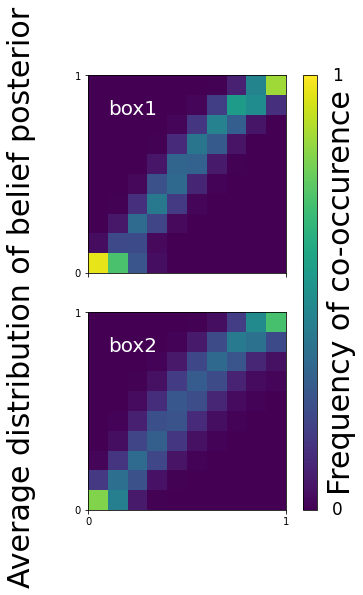

In [39]:
fig_beliefdist, ax = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig_beliefdist.text(0.1, 0, 'Average distribution of belief posterior',
                    fontsize = 30, rotation = 90)

ax[0].imshow(mutual1, origin='lower', extent=[0,1,0,1], vmin=0, vmax=1)
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))        
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].text(.1, .8, 'box1',  color = 'white', fontsize = 20.0,
        bbox={'facecolor': 'none', 'alpha': 0, 'pad': 8})

im = ax[1].imshow(mutual2, origin='lower', extent=[0,1,0,1], vmin=0, vmax=1)
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))        
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax[1].set_xticks([0, 1])
ax[1].set_yticks([0, 1])
ax[1].text(.1, .8, 'box2',  color = 'white', fontsize = 20.0,
        bbox={'facecolor': 'none', 'alpha': 0, 'pad': 8})



cbar = fig_beliefdist.colorbar(im, ax=ax.ravel().tolist(), shrink=1, aspect=30)
for j, lab in enumerate(['0','1']):
    cbar.ax.text(2.4, j , lab, ha='center', va='center', fontsize = 17, fontname = 'CMU Serif')
cbar.ax.get_yaxis().set_ticks([])
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('Frequency of co-occurence', rotation=90, fontsize = 30, fontname = 'CMU Serif')


#fig_beliefdist.savefig('belief_conditionaldist.pdf', format='pdf', bbox_inches = 'tight')


# check std of beliefs

In [43]:
# bel1_std = np.sum(np.multiply(np.square(np.tile(belief_array, (T,1)).T - np.tile(belief1_est_EXP, (nq,1))), 
#                    belief1_est.T), axis = 0)
# plt.scatter(quan_true_bel1, bel1_std)

In [44]:
# para_check_set = rmv_dup_arrary(point)
# bel_std_set = np.zeros((2,len(para_check_set), T))
# bel_MAP_set = np.zeros((2,len(para_check_set), T))

# for i, para_test in enumerate(para_check_set):
#     para_test = np.copy(para_test)
#     twoboxCol_test = twoboxColMDP(discount, nq, nr, na, nl, para_test)
#     twoboxCol_test.setupMDP()
#     twoboxCol_test.solveMDP_sfm()
#     ThA = twoboxCol_test.ThA
#     policy = twoboxCol_test.softpolicy
#     pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
#     Trans_hybrid_obs12 = twoboxCol_test.Trans_hybrid_obs12
#     Obs_emis_trans1 = twoboxCol_test.Obs_emis_trans1
#     Obs_emis_trans2 = twoboxCol_test.Obs_emis_trans2
#     twoboxColHMM_test = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)
    
#     alpha_test, scale_test = twoboxColHMM_test.forward_scale(obs)
#     beta_test = twoboxColHMM_test.backward_scale(obs, scale_test)
#     gamma_test = twoboxColHMM_test.compute_gamma(alpha_test, beta_test)
#     xi_test = twoboxColHMM_test.compute_xi(alpha_test, beta_test, obs)
    
#     belief1_test = np.sum(np.reshape(gamma_test[:, :].T, (T, nq, nq)), axis = 2)
#     belief2_test = np.sum(np.reshape(gamma_test[:, :].T, (T, nq, nq)), axis = 1)
#     #print(belief1_test[:10, 0])
    
#     belief1_test_EXP = belief1_test.dot(belief_array)
#     belief2_test_EXP = belief2_test.dot(belief_array)
    
#     bel_MAP_set[0,i,:] = (np.argmax(belief1_test, axis = 1) + 0.5)/nq
#     bel_MAP_set[1,i,:] = (np.argmax(belief2_test, axis = 1) + 0.5)/nq


    
#     bel_std_set[0, i, :] = np.sum(np.multiply(np.square(np.tile(belief_array, (T,1)).T - np.tile(belief1_test_EXP, (nq,1))), 
#                    belief1_test.T), axis = 0)
#     bel_std_set[1, i, :] = np.sum(np.multiply(np.square(np.tile(belief_array, (T,1)).T - np.tile(belief1_test_EXP, (nq,1))), 
#                    belief1_test.T), axis = 0)
    

In [45]:
# plt.figure(figsize=(5.15, 5.15))
# plt.clf()
# plt.subplot(111)
# for i in range(len(uniques)):
#     plt.scatter(quan_true_bel1, bel_std_set[0, 1])
# plt.xlabel('POMDP belief')
# plt.ylabel('std')

In [46]:
# plt.figure(figsize=(5.15, 5.15))
# plt.clf()
# plt.subplot(111)
# for i in range(len(uniques)):
#     plt.scatter(bel_MAP_set[0,i], bel_std_set[0, i])
# plt.xlabel('MAP belief')
# plt.ylabel('std')

# Calculate Hessian

In [47]:
# L =len(parametersAgent)
# hes = np.zeros((L,L))

# paraHessian = point[-1]
# twoboxd = twoboxColMDP_der(discount, nq, nr, na, nl, paraHessian)
# twoboxd1st = twoboxd.dloglikelihhod_dpara_sim(obs)

In [48]:
# perturb = 10** -6
# for i in range(L):
#     if i != 7:
#         para_perb = np.copy(paraHessian)
#         para_perb[i] += perturb

#         twoboxd_perb = twoboxColMDP_der(discount, nq, nr, na, nl, para_perb)       
#         twoboxd1st_pert = twoboxd_perb.dloglikelihhod_dpara_sim(obs)

#         hes[i, :] = (twoboxd1st_pert - twoboxd1st) / perturb

In [49]:
# w, v = np.linalg.eig(hes)
# w, v

# behavioral statistics

In [50]:
from POMDP_generate import *

In [51]:
obsN_est, latN_est, truthN_est, _ = twoboxColGenerate(point_final, 
                                                      parametersExp, sample_length = T, sample_number = 1, nq = 5, 
                                                      save = False)


Set the parameters of the model... 

Generating data...


In [52]:
obs_est = obsN_est[0]
lat_est = latN_est[0]

act_est = obs_est[:, 0]
rew_est = obs_est[:, 1]
loc_est = obs_est[:, 2]
col1_est = obs_est[:, 3]
col2_est = obs_est[:, 4]

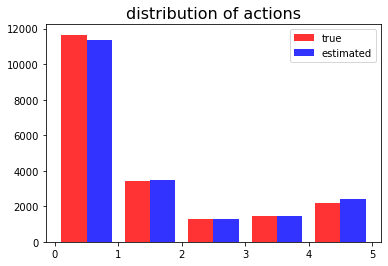

In [53]:
# histogram of actions
fig1, ax = plt.subplots()
plt.title('distribution of actions', fontsize = 16)
plt.hist([np.squeeze(act), np.squeeze(act_est)], bins = [0,1,2,3,4,5], 
         color = ['red','blue'], label = ['true', 'estimated'], alpha = 0.8)
plt.legend()
#ax[1].hist(np.squeeze(action), bins = 5, normed=False, weights=weights)
plt.show()

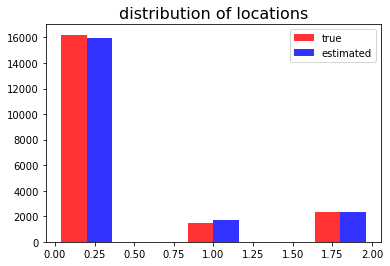

In [54]:
# histogram of locations
fig2, ax = plt.subplots()
plt.title('distribution of locations', fontsize = 16)
plt.hist([np.squeeze(loc), np.squeeze(loc_est)], 
         bins = 5, color = ['red','blue'], label = ['true', 'estimated'], alpha = 0.8)
plt.legend()
#ax[1].hist(np.squeeze(action), bins = 5, normed=False, weights=weights)
plt.show()

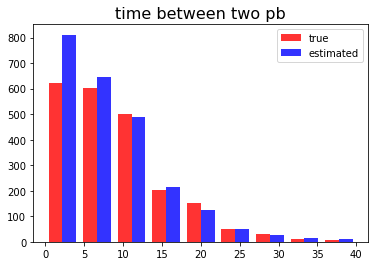

In [55]:
pbind_est = np.where(np.squeeze(act_est) == 4)[0]
pbind = np.where(np.squeeze(act) == 4)[0]
pbind_POMDP = np.where(np.squeeze(act_POMDP) == 4)[0]

# time between two pb
fig3, ax = plt.subplots()
plt.title('time between two pb', fontsize = 16)
plt.hist([pbind[1:] - pbind[0:-1], pbind_est[1:] - pbind_est[0:-1]],
        bins = np.linspace(0, 40, 10), alpha = 0.8, color = ['red','blue'], label = ['true', 'estimated'])
plt.legend()
#ax[1].hist(pbind[1:] - pbind[0:-1])
plt.show()

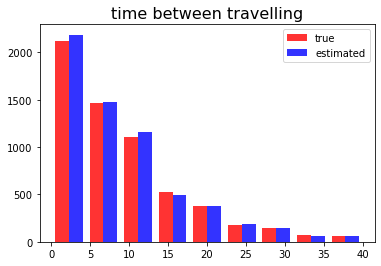

In [56]:
travelind_est = np.concatenate((np.where(np.squeeze(act_est) == 1)[0], 
                              np.where(np.squeeze(act_est) == 2)[0],
                              np.where(np.squeeze(act_est) == 3)[0]))
travelind = np.concatenate((np.where(np.squeeze(act) == 1)[0], 
                              np.where(np.squeeze(act) == 2)[0],
                              np.where(np.squeeze(act) == 3)[0]))
travelind_POMDP = np.concatenate((np.where(np.squeeze(act_POMDP) == 1)[0], 
                              np.where(np.squeeze(act_POMDP) == 2)[0],
                              np.where(np.squeeze(act_POMDP) == 3)[0]))



# time between two travelling
fig4, ax = plt.subplots()
plt.title('time between travelling', fontsize = 16)
plt.hist([travelind[1:] - travelind[0:-1], travelind_est[1:] - travelind_est[0:-1]], 
         bins = np.linspace(0, 40, 10), 
         color = ['red','blue'], label = ['true', 'estimated'], alpha = 0.8)
plt.legend()
#ax[1].hist(pbind[1:] - pbind[0:-1])
plt.show()

<ipython-input-57-6b101ef89cce>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(labels, rotation=60, ha = 'center', fontsize = 20)


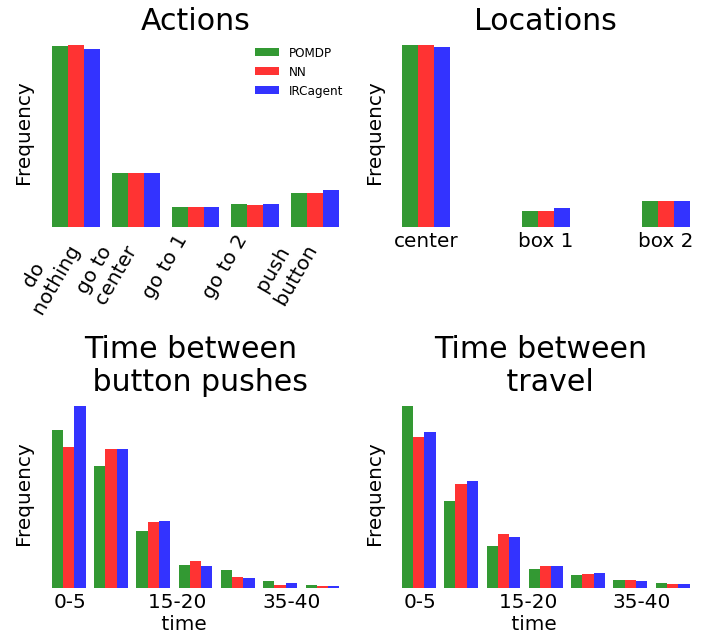

In [57]:
"""
behavioral statistics of an agent with IRC parameter
histogram NOT normalized
"""
fig_behav, ax = plt.subplots(2, 2, figsize=(10, 9))

ax[0, 0].hist([np.squeeze(act_POMDP), np.squeeze(act), np.squeeze(act_est)], bins = [0,1,2,3,4,5], 
         color = ['green', 'red','blue'], label = ['POMDP','NN', 'IRCagent'], alpha = 0.8)
ax[0, 0].legend(fontsize = 12, frameon = False)
ax[0, 0].set_title('Actions', fontsize = 30)
labels = [item.get_text() for item in ax[0, 0].get_xticklabels()]
labels[1] = 'do \n nothing'
labels[2] = 'go to \n center'
labels[3] = 'go to 1'
labels[4] = 'go to 2'
labels[5] = 'push \n button'
ax[0, 0].set_ylabel('Frequency', fontsize = 20)
ax[0, 0].set_xticklabels(labels, rotation=60, ha = 'center', fontsize = 20)
ax[0, 0].xaxis.set_tick_params(length = 0)
ax[0, 0].set_yticks([])
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['bottom'].set_visible(False)
ax[0, 0].spines['left'].set_visible(False)


ax[0, 1].set_title('Locations', fontsize = 30)
ax[0, 1].hist([np.squeeze(loc), np.squeeze(loc), np.squeeze(loc_est)], 
         bins = 5, color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'], alpha = 0.8)
ax[0, 1].set_xticks(np.arange(0, 2, 0.2))
labels = [item.get_text() for item in ax[0, 1].get_xticklabels()]
labels[1] = 'center'
labels[5] = 'box 1'
labels[9] = 'box 2'
ax[0, 1].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[0, 1].xaxis.set_tick_params(length = 0)
ax[0, 1].set_yticks([])
ax[0, 1].set_ylabel('Frequency', fontsize = 20)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['bottom'].set_visible(False)
ax[0, 1].spines['left'].set_visible(False)


ax[1, 0].set_title('Time between \n button pushes', fontsize = 30)
ax[1, 0].hist([pbind_POMDP[1:] - pbind_POMDP[0:-1], 
               pbind[1:] - pbind[0:-1], 
               pbind_est[1:] - pbind_est[0:-1]],
        bins = np.linspace(0, 40, 8), alpha = 0.8, 
              color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'])
ax[1, 0].set_ylabel('Frequency', fontsize = 20)
ax[1, 0].set_xticks(range(0,41, 3))
labels = [item.get_text() for item in ax[1, 0].get_xticklabels()]
labels[1] = '0-5'
labels[6] = '15-20 \n time'
labels[11] = '35-40'
ax[1, 0].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[1, 0].xaxis.set_tick_params(length = 0)
ax[1, 0].set_yticks([])
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].spines['bottom'].set_visible(False)
ax[1, 0].spines['left'].set_visible(False)


ax[1, 1].set_title('Time between \n travel', fontsize = 30)
ax[1, 1].set_ylabel('Frequency', fontsize = 20)
ax[1, 1].hist([travelind_POMDP[1:] - travelind_POMDP[0:-1], 
               travelind[1:] - travelind[0:-1], 
               travelind_est[1:] - travelind_est[0:-1]], 
         bins = np.linspace(0, 40, 8), 
         color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'], alpha = 0.8)
ax[1, 1].set_xticks(range(0,41, 3))
labels = [item.get_text() for item in ax[1, 1].get_xticklabels()]
labels[1] = '0-5'
labels[6] = '15-20 \n time'
labels[11] = '35-40'
ax[1, 1].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[1, 1].xaxis.set_tick_params(length = 0)
ax[1, 1].set_yticks([])
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].spines['bottom'].set_visible(False)
ax[1, 1].spines['left'].set_visible(False)




plt.tight_layout()
#fig_behav.savefig('behavior_state.pdf', format='pdf', bbox_inches = 'tight')



0.9999999999998981 0.9999999999998981 0.9999999999998981
0.9999999999998981 0.9999999999998981 0.9999999999998981
[[0.4040497  0.31293143 0.14588127 0.05844455 0.04601933 0.01978831
  0.00736309]
 [0.36018307 0.35286041 0.16933638 0.07002288 0.02974828 0.00915332
  0.00503432]
 [0.42426778 0.32343096 0.15564854 0.05230126 0.02468619 0.01297071
  0.00460251]]
0.9944776806258391 0.9944776806258391 0.9944776806258391
[[0.49486191 0.23619139 0.11335902 0.05266538 0.03676943 0.02360308
  0.01332691]
 [0.41355216 0.28501787 0.14965876 0.06191095 0.0401365  0.02177446
  0.01283718]
 [0.42227564 0.29102564 0.13878205 0.0599359  0.04054487 0.02099359
  0.01057692]]
0.9707771355171055 0.9707771355171055 0.9707771355171055


<ipython-input-58-48057fa947ad>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(labels, rotation=60, ha = 'center', fontsize = 20)


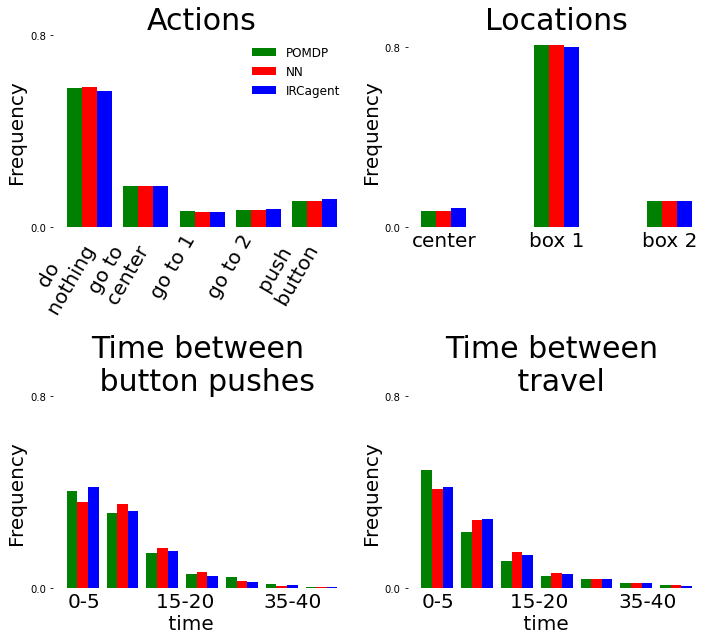

In [58]:
"""
behavioral statistics of an agent with IRC parameter
histogram NORMALIZED
"""

fig_behav, ax = plt.subplots(2, 2, figsize=(10, 9))

weights_act_POMDP = np.ones_like(np.squeeze(act_POMDP))/float(len(np.squeeze(act_POMDP)))
weights_act = np.ones_like(np.squeeze(act))/float(len(np.squeeze(act)))
weights_act_IRC = np.ones_like(np.squeeze(act_est))/float(len(np.squeeze(act_est)))


heights, bins, batch = ax[0, 0].hist([np.squeeze(act_POMDP), np.squeeze(act), np.squeeze(act_est)], 
              weights = [weights_act_POMDP, weights_act, weights_act_IRC], bins = [0,1,2,3,4,5], 
         color = ['green', 'red','blue'], label = ['POMDP','NN', 'IRCagent'])
print(np.sum(heights[0]), np.sum(heights[0]), np.sum(heights[0]))
ax[0, 0].legend(fontsize = 12, frameon = False)
ax[0, 0].set_title('Actions', fontsize = 30)
labels = [item.get_text() for item in ax[0, 0].get_xticklabels()]
labels[1] = 'do \n nothing'
labels[2] = 'go to \n center'
labels[3] = 'go to 1'
labels[4] = 'go to 2'
labels[5] = 'push \n button'
ax[0, 0].set_ylabel('Frequency', fontsize = 20)
ax[0, 0].set_xticklabels(labels, rotation=60, ha = 'center', fontsize = 20)
ax[0, 0].xaxis.set_tick_params(length = 0)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['bottom'].set_visible(False)
ax[0, 0].spines['left'].set_visible(False)
ax[0, 0].set_yticks([0, .8])

weights_loc = np.ones_like(np.squeeze(loc))/float(len(np.squeeze(loc)))
weights_loc_IRC = np.ones_like(np.squeeze(loc_est))/float(len(np.squeeze(loc_est)))

ax[0, 1].set_title('Locations', fontsize = 30)
heights, bins, batch = ax[0, 1].hist([np.squeeze(np.abs(2*loc - 3/2)-1/2), 
                                      np.squeeze(np.abs(2*loc - 3/2)-1/2), 
                                      np.squeeze(np.abs(2*loc_est - 3/2)-1/2)],
                                     weights = [weights_loc, weights_loc, weights_loc_IRC],
         bins = 5, color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'])
print(np.sum(heights[0]), np.sum(heights[0]), np.sum(heights[0]))
ax[0, 1].set_xticks(np.arange(0, 2, 0.2))
labels = [item.get_text() for item in ax[0, 1].get_xticklabels()]
labels[1] = 'center'
labels[5] = 'box 1'
labels[9] = 'box 2'
ax[0, 1].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[0, 1].xaxis.set_tick_params(length = 0)
ax[0, 1].set_ylabel('Frequency', fontsize = 20)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].spines['bottom'].set_visible(False)
ax[0, 1].spines['left'].set_visible(False)
ax[0, 1].set_yticks([0, .8])


weights_pbind_POMDP = np.ones_like(pbind_POMDP[1:] )/float(len(pbind_POMDP[1:] ))
weights_pbind = np.ones_like(pbind[1:])/float(len(pbind[1:] ))
weights_pbind_IRC = np.ones_like(pbind_est[1:])/float(len(pbind_est[1:]))

ax[1, 0].set_title('Time between \n button pushes', fontsize = 30)
heights, bins, batch = ax[1, 0].hist([pbind_POMDP[1:] - pbind_POMDP[0:-1], 
               pbind[1:] - pbind[0:-1], 
               pbind_est[1:] - pbind_est[0:-1]],
              weights = [weights_pbind_POMDP, weights_pbind, weights_pbind_IRC],
              bins = np.linspace(0, 40, 8),  
              color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'])
print(heights)
print(np.sum(heights[0]), np.sum(heights[0]), np.sum(heights[0]))
ax[1, 0].set_ylabel('Frequency', fontsize = 20)
ax[1, 0].set_xticks(range(0,41, 3))
labels = [item.get_text() for item in ax[1, 0].get_xticklabels()]
labels[1] = '0-5'
labels[6] = '15-20 \n time'
labels[11] = '35-40'
ax[1, 0].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[1, 0].xaxis.set_tick_params(length = 0)
ax[1, 0].set_yticks([])
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].spines['bottom'].set_visible(False)
ax[1, 0].spines['left'].set_visible(False)
ax[1, 0].set_yticks([0, .8])

#
weights_travelind_POMDP = np.ones_like(travelind_POMDP[1:] )/float(len(travelind_POMDP[1:] ))
weights_travelind = np.ones_like(travelind[1:])/float(len(travelind[1:] ))
weights_travelind_IRC = np.ones_like(travelind_est[1:])/float(len(travelind_est[1:]))

ax[1, 1].set_title('Time between \n travel', fontsize = 30)
ax[1, 1].set_ylabel('Frequency', fontsize = 20)
heights, xbins, ptchs = ax[1, 1].hist([travelind_POMDP[1:] - travelind_POMDP[0:-1], 
               travelind[1:] - travelind[0:-1], 
               travelind_est[1:] - travelind_est[0:-1]], 
              weights = [weights_travelind_POMDP, weights_travelind, weights_travelind_IRC], 
              bins = np.linspace(0, 40, 8), 
              color = ['green', 'red','blue'], label = ['POMDP', 'NN', 'IRCagent'])
print(heights)
print(np.sum(heights[0]), np.sum(heights[0]), np.sum(heights[0]))

ax[1, 1].set_xticks(range(0,41, 3))
labels = [item.get_text() for item in ax[1, 0].get_xticklabels()]
labels[1] = '0-5'
labels[6] = '15-20 \n time'
labels[11] = '35-40'


ax[1, 1].set_xticklabels(labels, ha = 'center', fontsize = 20)
ax[1, 1].xaxis.set_tick_params(length = 0)
ax[1, 1].set_yticks([0, .8])
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].spines['bottom'].set_visible(False)
ax[1, 1].spines['left'].set_visible(False)




plt.tight_layout()
#fig_behav.savefig('behavior_state.pdf', format='pdf', bbox_inches = 'tight')

# Neural coding

Now the IRC is done. We will preprocess the data to prepare for neural analysis.


In [59]:
from data_preprocessing_notebook import *

In [60]:
data_preprocessing_encoding( idx,datestring_IRC,
                                 datestring_train,
                                 datestring_data,
                                 datestring_NNagent,NEURAL_NUM = 100)

data preprocessing for encoding is successfully done!


score [0.94608301 0.96457961]
score [0.94201266 0.96722637]
score [0.94607093 0.96557515]
score [0.94824061 0.96338913]
score [0.94561986 0.96754768]
score [0.94880532 0.96214191]
score [0.94492775 0.96304464]


findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


score [0.94885958 0.96385154]
score [0.94269628 0.96338227]
score [0.95023639 0.96489511]
Intercept:  [0.04252245 0.37151997]
Coef:  [[-7.10894774e-01  1.80014087e-01  8.67392942e-02  8.24589495e-02
  -1.97585906e-02  1.34242341e-01  8.08289051e-02  3.60408298e-02
   6.80411125e-02 -2.99518361e-01  3.57183149e-01  5.91755728e-01
   3.51619385e-02 -1.88468720e-01 -1.05184748e-03  1.24487442e-01
   1.64521117e-01 -3.33394680e-04  5.42306023e-01 -2.49552927e-01
  -7.91556678e-03 -2.56734222e-01 -3.66063213e-01  9.23201365e-02
  -5.41192076e-02  6.19456396e-01 -6.33166021e-02 -1.57728059e-02
  -2.17444028e-02 -1.31404173e-02 -3.38488361e-01  2.29909137e-01
  -2.19703357e-01  2.72390912e-02 -9.43794571e-02 -1.05265795e-02
  -4.35298629e-01  1.05205623e-01  5.96387868e-01 -7.97843842e-01
   8.53571083e-02  3.84108159e-02 -1.00257472e-01 -2.17581922e-01
  -3.25153337e-01  1.45850831e-01  7.06876559e-01  2.97618710e-01
  -2.41092661e-01 -3.05671446e-01  7.64095747e-02 -5.55683132e-01
  -2.7503

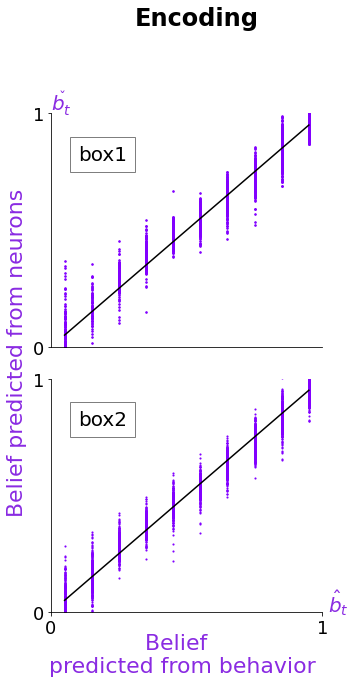

In [61]:
%run -i ./neural_encoding.ipynb

In [62]:
data_preprocessing_decoding_recodong( idx,
                                 datestring_IRC,
                                 datestring_train,
                                 datestring_data,
                                 datestring_NNagent)

data preprocessing for recoding/decoding is successfully done!


score [0.69999545 0.80988487]
score [0.69371719 0.80822433]
Mean squared error: 
 [0.01330771 0.01374135]
squared error std:
 [0.01755267 0.0176498 ]
score [0.71842482 0.81777305]
score [0.68984174 0.79711955]
score [0.68327304 0.7958195 ]
Mean squared error: 
 [0.01489304 0.01501121]
squared error std:
 [0.02073934 0.02195573]
score [0.69821728 0.80640847]
action 0 color 0 0.8988277729538022
action 0 color 1 0.9334564520765652
action 0 color 2 0.9392093443236181
action 0 color 3 0.9031794372929737
action 0 color 4 0.9097377488416886
action 1 color 0 0.8896831441411133
action 1 color 1 0.921466446055297
action 1 color 2 0.9229492350874878
action 1 color 3 0.9048398365537134
action 1 color 4 0.8564722309300832
action 2 color 0 0.9415291668899095
action 2 color 1 0.9416477267217145
action 2 color 2 0.9166755787075703
action 2 color 3 0.8837032034680936
action 2 color 4 0.7498441763359497
action 3 color 0 0.8438257475914226
action 3 color 1 0.9292889975298742
action 3 color 2 0.9484066376

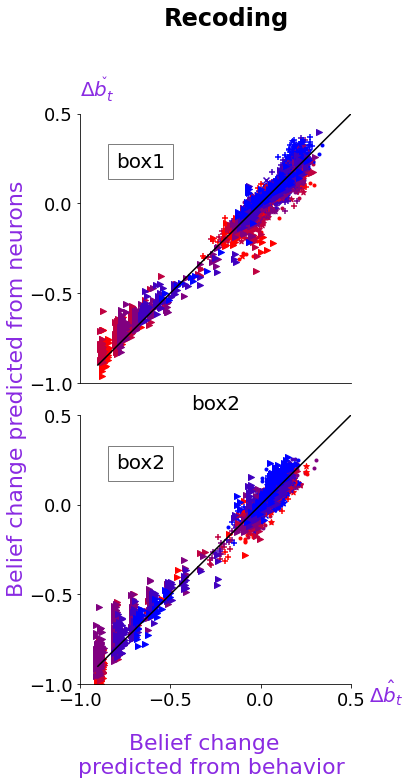

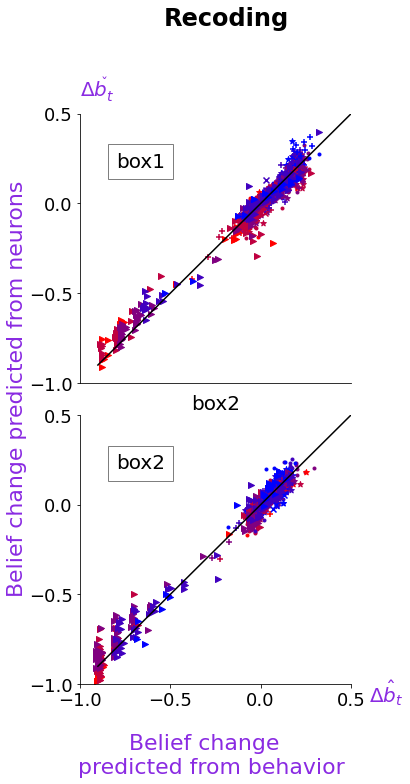

In [63]:
%run -i ./neural_recoding_KRR.ipynb

Using RBF nonlinearity.


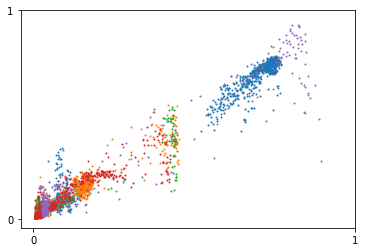

/Users/zhengwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score [0.15353187]


/Users/zhengwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


score [0.14679328]


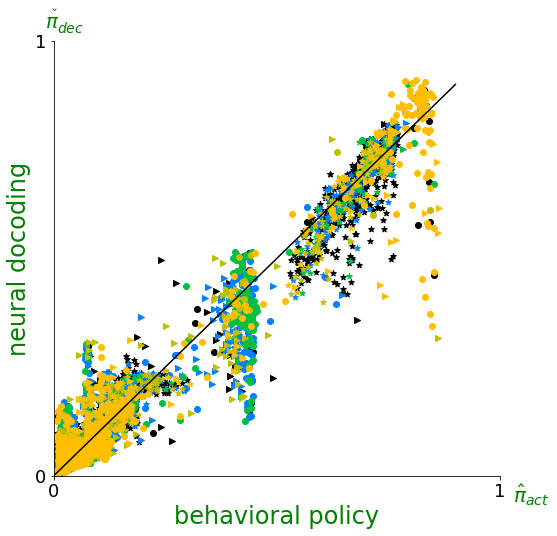

findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


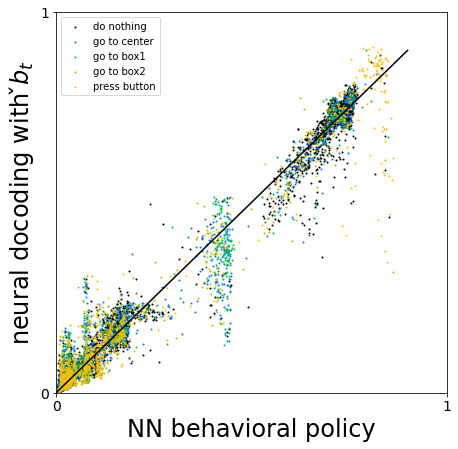

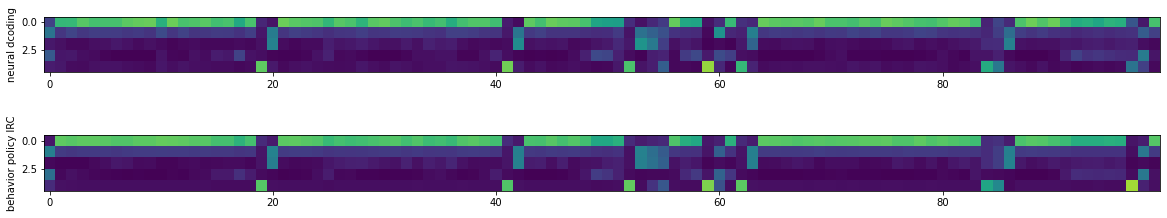

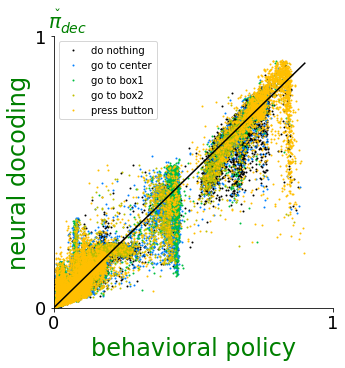

In [64]:
%run -i ./neural_decoding_LR.ipynb